In [18]:
import matplotlib.pyplot as plt
from question4 import *
from etape2_Q3 import *
import numpy as np
from sklearn.calibration import CalibrationDisplay


In [2]:
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

In [3]:
df2015 = create_full_df(directory2015)
df2016 = create_full_df(directory2016)
df2017 = create_full_df(directory2017)
df2018 = create_full_df(directory2018)

In [4]:
df_train = pd.concat([df2015, df2016, df2017], ignore_index=True)
df_val = df2018
df_train = df_train.dropna(subset="Distance")
df_val = df_val.dropna(subset="Distance")

In [5]:
X_train = df_train["Distance"]
y_train = df_train["Est_un_but"]
X_val = df_val["Distance"]
y_val = df_val["Est_un_but"]

In [6]:
y_score, y_prob, clf = logistic_regression(X_train, y_train, X_val)

In [7]:
fpr, tpr, roc_auc = get_roc_data(y_prob[:,1], y_val)

In [8]:
perc, perc_values, num_goals = get_percentile_goal_chance(y_prob[:,1], y_val)

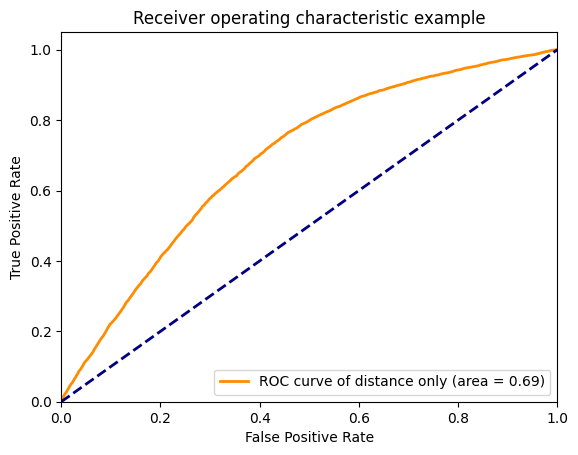

In [9]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color="darkorange",lw=lw,label="ROC curve of distance only (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

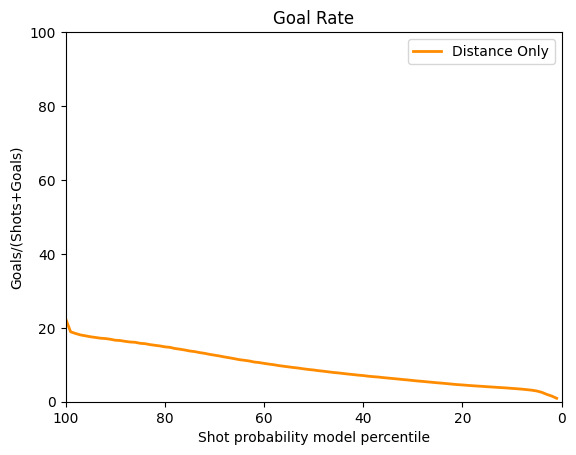

In [10]:
plt.figure()
lw = 2
perc_values_100 = [i*100 for i in perc_values]
plt.plot(perc,perc_values_100,color="darkorange",lw=lw,label="Distance Only")
plt.xlim([100, 0])
plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

In [11]:
cum_values = np.cumsum(num_goals)

In [12]:
cum_values = [i/77.54 for i in cum_values]

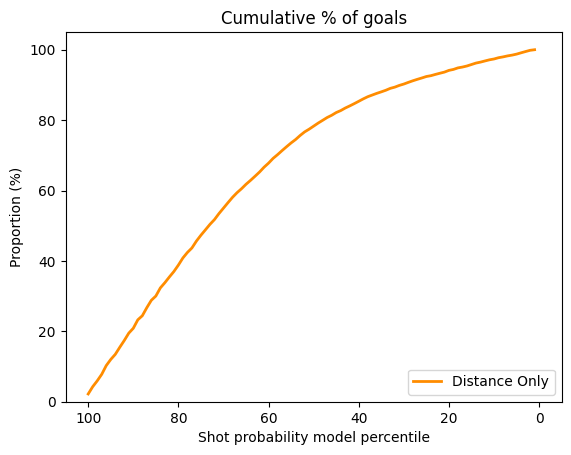

In [13]:
plt.figure()
lw = 2
plt.plot(perc,cum_values,color="darkorange",lw=lw,label="Distance Only")
plt.xlim([105, -5])
plt.ylim([0, 105])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Proportion (%)")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.show()

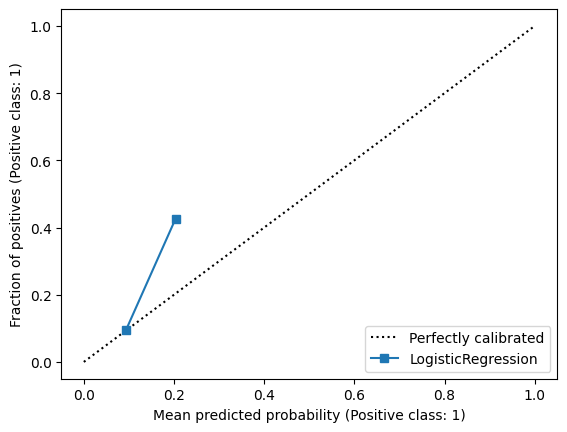

In [21]:
X_val = np.array(X_val)
X_val = X_val.reshape(-1, 1)
disp = CalibrationDisplay.from_estimator(clf, X_val, y_val)